## Summary

## Import Libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Import Datasets

In [12]:
enron_df = pd.read_csv('datasets/explored/enron-emails-explored.csv')
mal_df = pd.read_csv('datasets/explored/malicious-emails-explored.csv')

Create the Training sets

In [13]:
import random


part_1 = enron_df.sample(11871, ignore_index=True, random_state=1)
part_2 = mal_df
rand = round(random.random())

training_set = (pd.concat([part_1, part_2], ignore_index=True)).sample(frac=1, ignore_index=True, random_state=rand)

In [15]:
training_set.columns

Index(['Unnamed: 0', 'body', 'subject', 'raw_mail', 'from', 'to', 'status',
       'date', 'parsed_from', 'parsed_to', 'parsed_date', 'malicious',
       'content_type', 'charset', 'content_transfer_encoding', 'from_domain',
       'to_domain', 'html', 'javascript', 'css', 'html_form', 'html_iframe',
       'URLs_in_message', 'subject_len', 'subject_entropy', 'body_entropy',
       'attachement'],
      dtype='object')

In [18]:
features = [
    'content_type',
    'content_transfer_encoding',
    'charset',
    'html', 
    'javascript', 
    'css', 
    'html_form', 
    'html_iframe',
    'URLs_in_message', 
    'subject_len', 
    'subject_entropy', 
    'body_entropy',
    'attachement'
]

In [19]:
training_set[features]

,content_type,content_transfer_encoding,charset,html,javascript,css,html_form,html_iframe,URLs_in_message,subject_len,subject_entropy,body_entropy,attachement
0,4,2,14,1,0,1,0,0,3,42,4.026030,4.986394,0
1,1,1,1,0,0,0,0,0,0,36,3.974938,4.566216,0
2,4,2,14,1,0,0,0,0,5,24,3.938722,5.446724,0
3,4,2,14,1,0,0,0,0,1,44,4.036041,5.274466,0
4,1,1,1,0,0,0,0,0,0,16,3.625000,3.006239,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,5,1,0,0,0,0,0,0,18,3.572431,4.480296,0
19996,3,3,0,0,0,0,0,0,1,94,4.909456,4.908874,0
19997,1,1,1,0,0,0,0,0,0,61,4.543374,4.277969,0
19998,1,2,1,0,0,0,0,0,2,13,3.546594,0.866078,0


In [20]:
X = training_set[features]
y = training_set.malicious

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = rand)

In [21]:
X.describe()

,content_type,content_transfer_encoding,charset,html,javascript,css,html_form,html_iframe,URLs_in_message,subject_len,subject_entropy,body_entropy,attachement
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.62705,1.797750,1.757500,0.107900,0.159600,0.079150,0.002400,0.000600,2.676050,30.771800,3.696848,4.793095,0.144350
std,1.15435,1.189712,3.269775,0.310262,1.444483,0.432776,0.059114,0.024488,8.816654,31.105961,0.631801,0.486961,0.755408
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000
25%,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,3.452820,4.552525,0.000000
50%,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,3.794653,4.806861,0.000000
75%,1.00000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,40.000000,4.092136,5.056293,0.000000
max,5.00000,6.000000,26.000000,1.000000,95.000000,14.000000,3.000000,1.000000,142.000000,2659.000000,5.359526,6.134659,27.000000


In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sn
import matplotlib.pyplot as plt

## Decision Tree

Number of mislabeled points out of a total: 5000 points: 98
The accuracy of the model is: 98%
Precision of the model is: 98%
Recall of the model is: 98%
F1 score of the model is: 98%


<AxesSubplot:>

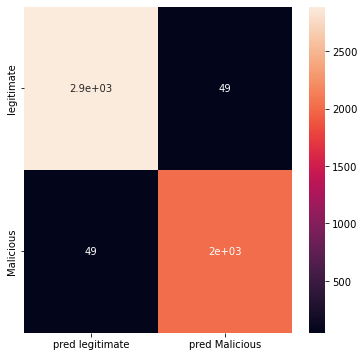

In [23]:
dts_clf = DecisionTreeClassifier(random_state=rand)
dts_model = dts_clf.fit(train_X, train_y)
pred_y = dts_model.predict(val_X)

print(f"Number of mislabeled points out of a total: {len(val_X)} points: {(val_y != pred_y).sum()}")
print(f"The accuracy of the model is: {round((val_y == pred_y).sum() / len(val_X) * 100)}%")
print(f'Precision of the model is: {round(precision_score(val_y, pred_y) * 100)}%')
print(f'Recall of the model is: {round(recall_score(val_y, pred_y) * 100)}%')
print(f'F1 score of the model is: {round(f1_score(val_y, pred_y) * 100)}%')

cm = confusion_matrix(val_y, pred_y)
df_cm = pd.DataFrame(cm, index=['legitimate', 'Malicious'], columns=['pred legitimate', 'pred Malicious'])

plt.figure(figsize=(6,6))
sn.heatmap(df_cm, annot=True)

## KNN

Number of mislabeled points out of a total: 5000 points: 172
The accuracy of the model is: 97%
Precision of the model is: 97%
Recall of the model is: 95%
F1 score of the model is: 96%
F1 score of the model is: 96%


<AxesSubplot:>

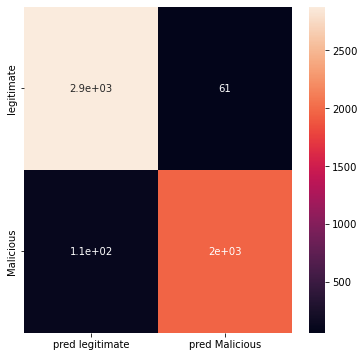

In [24]:
knn_clf = KNeighborsClassifier()
knn_model = knn_clf.fit(train_X, train_y)
pred_y = knn_model.predict(val_X)

print(f"Number of mislabeled points out of a total: {len(val_X)} points: {(val_y != pred_y).sum()}")
print(f"The accuracy of the model is: {round((val_y == pred_y).sum() / len(val_X) * 100)}%")
print(f'Precision of the model is: {round(precision_score(val_y, pred_y) * 100)}%')
print(f'Recall of the model is: {round(recall_score(val_y, pred_y) * 100)}%')
print(f'F1 score of the model is: {round(f1_score(val_y, pred_y) * 100)}%')
print(f'F1 score of the model is: {round(f1_score(val_y, pred_y) * 100)}%')

cm = confusion_matrix(val_y, pred_y)
df_cm = pd.DataFrame(cm, index=['legitimate', 'Malicious'], columns=['pred legitimate', 'pred Malicious'])

plt.figure(figsize=(6,6))
sn.heatmap(df_cm, annot=True)

## Random Forest

Number of mislabeled points out of a total: 5000 points: 74
The accuracy of the model is: 99%
Precision of the model is: 99%
Recall of the model is: 98%
F1 score of the model is: 98%


<AxesSubplot:>

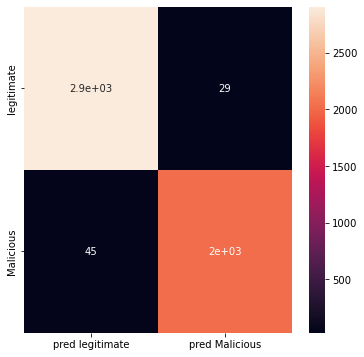

In [25]:
rf_clf = RandomForestClassifier(random_state=rand)
rf_model = rf_clf.fit(train_X, train_y)
pred_y = rf_model.predict(val_X)

print(f"Number of mislabeled points out of a total: {len(val_X)} points: {(val_y != pred_y).sum()}")
print(f"The accuracy of the model is: {round((val_y == pred_y).sum() / len(val_X) * 100)}%")
print(f'Precision of the model is: {round(precision_score(val_y, pred_y) * 100)}%')
print(f'Recall of the model is: {round(recall_score(val_y, pred_y) * 100)}%')
print(f'F1 score of the model is: {round(f1_score(val_y, pred_y) * 100)}%')

cm = confusion_matrix(val_y, pred_y)
df_cm = pd.DataFrame(cm, index=['legitimate', 'Malicious'], columns=['pred legitimate', 'pred Malicious'])

plt.figure(figsize=(6,6))
sn.heatmap(df_cm, annot=True)

## Naive Bayes

Number of mislabeled points out of a total: 5000 points: 224
The accuracy of the model is: 96%
Precision of the model is: 99%
Recall of the model is: 90%
F1 score of the model is: 94%


<AxesSubplot:>

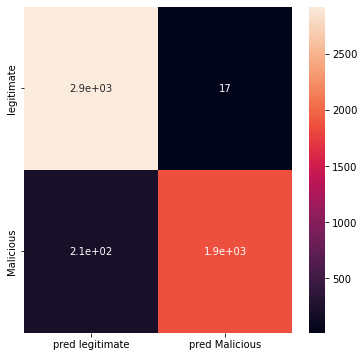

In [26]:
nb_clf = GaussianNB()
nb_model = nb_clf.fit(train_X, train_y)
pred_y = nb_model.predict(val_X)

print(f"Number of mislabeled points out of a total: {len(val_X)} points: {(val_y != pred_y).sum()}")
print(f"The accuracy of the model is: {round((val_y == pred_y).sum() / len(val_X) * 100)}%")
print(f'Precision of the model is: {round(precision_score(val_y, pred_y) * 100)}%')
print(f'Recall of the model is: {round(recall_score(val_y, pred_y) * 100)}%')
print(f'F1 score of the model is: {round(f1_score(val_y, pred_y) * 100)}%')

cm = confusion_matrix(val_y, pred_y)
df_cm = pd.DataFrame(cm, index=['legitimate', 'Malicious'], columns=['pred legitimate', 'pred Malicious'])

plt.figure(figsize=(6,6))
sn.heatmap(df_cm, annot=True)